# Introdução (Texto gerado por IA para testar o Gemini)

**NoteBook de Python para Data Science**

Este NoteBook abrangente fornece um guia passo a passo para o estudo de Data Science usando Python. Ele cobre os seguintes tópicos:

- **Introdução à Data Science:** Conceitos básicos, ferramentas e técnicas.
- **Manipulação de Dados com Pandas:** Carregamento, limpeza, transformação e análise de dados.
- **Visualização de Dados com Matplotlib e Seaborn:** Criação de gráficos e visualizações para explorar e entender os dados.
- **Modelagem Preditiva com Scikit-learn:** Construção e avaliação de modelos preditivos usando técnicas de aprendizado de máquina.
- **Aprendizado Profundo com Tensorflow:** Introdução ao aprendizado profundo e construção de modelos neurais para tarefas complexas.
- **Processamento de Linguagem Natural (PNL):** Técnicas para analisar e processar dados de texto.
- **Projetos Práticos:** Estudos de caso e exercícios práticos para aplicar os conceitos aprendidos.

Este NoteBook é projetado para iniciantes e profissionais que buscam aprimorar suas habilidades em Data Science usando Python. Ele oferece uma base sólida nos fundamentos e técnicas avançadas, permitindo que os alunos desenvolvam proficiência em análise e modelagem de dados.

# **Códigos**

## Importações

In [4]:
import pandas as pd

## Integração com o Gemini da Google
- Irei utilizar o conhecimento que adquiri durante a Imersão de IA que realizei para potencializar meus estudos e aprendizados nessa outra Imersão

In [1]:
#Instalando o SDK do Google
!pip install -q -U google-generativeai

#Configurações iniciais
import google.generativeai as genai

# Adicionando a minha API Key do Google e configurando ela
GOOGLE_API_KEY=""
genai.configure(api_key=GOOGLE_API_KEY)

# Definindo configurações da geração dos dados
generation_config = {
  "candidate_count": 1,
  "temperature": 0.5,
}

# Definindo configurações de segurança
safety_settings={
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL' : 'BLOCK_NONE',
    'DANGEROUS' : 'BLOCK_NONE'
    }

# Definindo o modelo que será utilizado
model = genai.GenerativeModel(model_name='gemini-1.0-pro',
                                  generation_config=generation_config,
                                  safety_settings=safety_settings,)

response = model.generate_content("Isso é um NoteBook de Python para estudo de Data Science. Faça uma breve descrição usando a linguagem MarkDown")
# print(response.text)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.8/677.8 kB 10.8 MB/s eta 0:00:00


## Iniciando o DataSet


In [5]:
# Salvando a url com o dataset
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

# Lendo o arquivo
dados = pd.read_csv(url)

# Imprimindo os 5 primeiros dados do DataSet
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## Conhecando o DataSet

In [14]:
# Vendo as informações do dataset, ex: o type de cada coluna
print(dados.info())
print("-------------------------------------")

# Vendo o tamanho do dataset
print(dados.shape)
print("-------------------------------------")

# Vendo as estatísticas do dataset
print(dados.describe())
print("-------------------------------------")

# Pegando uma amostra aleatória do dataset
print(dados.sample())
print("-------------------------------------")

# Pegando só uma coluna
print(dados["Bairro"])
print("-------------------------------------")

# Pegando um bairro de uma coluna específica
print(dados['Bairro'][6522])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB
None
-------------------------------------
(10008, 8)
-------------------------------------
            Metragem       Quartos     Banheiros         Vagas
count   10008.000000  10008.000000  10008.000000  10008.000000
mean      442.300659      3.483114      3.879097      4.097222
std      7515.379389      1.064200      1.988467      2.824014
min        10.000000      1.000000      1.000000      1.000000
25%       173.000000      3.000000      2.0

## Realizando calculos e operações com o DataSet

In [32]:
# Calculando a média da metragem dos imóveis
metragem_media = dados["Metragem"].mean()

print(f"A média de metragem dos imóveis é de {round(metragem_media, 2)} metros\n")

# Calculando a quantidade de imóveis localizados em Vila Mariana
qntd_vila_mariana = sum((dados["Bairro"] == "Vila Mariana"))

print(f"Em Vila Mariana temos {qntd_vila_mariana} imóveis\n")

# Calculando a metragem média de imóveis no bairro de Vila Mariana
imoveis_vila_mariana = dados[dados["Bairro"] == "Vila Mariana"]

metragem_media_vila_mariana = imoveis_vila_mariana["Metragem"].mean()

print(f"A metragem média de imóveis no bairro de Vila Mariana é de {round(metragem_media_vila_mariana, 2)} metros\n")

# Mostre a quantidade de imóveis por bairro
qntd_imoveis_por_bairro = dados["Bairro"].value_counts()

maior_qntd_imoveis = qntd_imoveis_por_bairro.index[0]

print(f"Dos {len(qntd_imoveis_por_bairro)} bairros, o bairro de {maior_qntd_imoveis} é o que mais tem imóveis, com um total de {qntd_imoveis_por_bairro[0]}")

A média de metragem dos imóveis é de 442.3 metros

Em Vila Mariana temos 184 imóveis

A metragem média de imóveis no bairro de Vila Mariana é de 233.62 metros

Dos 701 bairros, o bairro de Alto de Pinheiros é o que mais tem imóveis, com um total de 409


## Gráficos:

<Axes: xlabel='Bairro'>

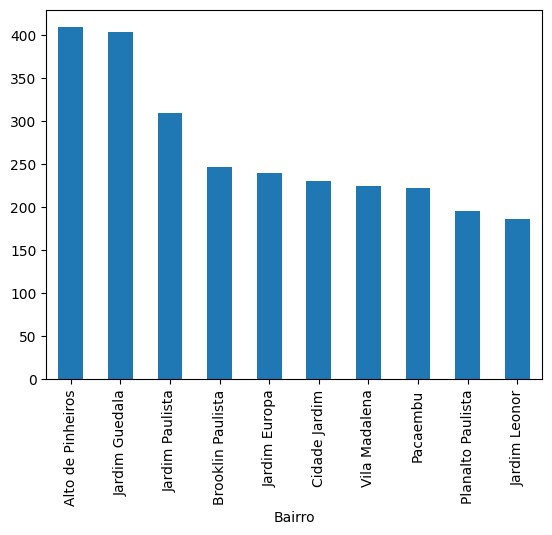

In [19]:
# Gráfico usando o pandas
num_imoveis_bairro = dados["Bairro"].value_counts()

# Pegando os 10 bairros com mais imóveis e botando num gráfico de barra
num_imoveis_bairro.head(10).plot.bar()

# **Desafios:**


## Desafio 1

### Calcule a média da metragem dos imóveis por bairro

In [47]:
# Agrupando por bairro
dados_bairro = dados.groupby("Bairro")

# Calculando a média da metragem por bairro
media_metragem_bairro = dados_bairro["Metragem"].mean()

# Imprimindo a média da metragem por bairro
print(media_metragem_bairro)

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64


## Desafio 2

### Duas formas de selecionar os dados por bairro

In [48]:
# Podemos usar a função do pandas loc() que Access group of values using labels.
dados.loc[dados["Bairro"] == "Vila Mariana"]

# Podemos apenas botar desse jeito também
dados[dados["Bairro"] == "Vila Mariana"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


## Desafio 3

### Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF. A partir desse gráfico você deve tirar algumas conclusões

Bairro
Aclimação            1.763200e+06
Alto da Boa Vista    2.391250e+06
Alto da Lapa         2.083169e+06
Alto da Mooca        1.184170e+06
Alto de Pinheiros    4.782699e+06
                         ...     
Vila Água Funda      6.520000e+05
Água Branca          1.226500e+06
Água Fria            9.270833e+05
Água Funda           5.450000e+05
Água Rasa            7.161667e+05
Name: Valor, Length: 701, dtype: float64


<Axes: xlabel='Bairro'>

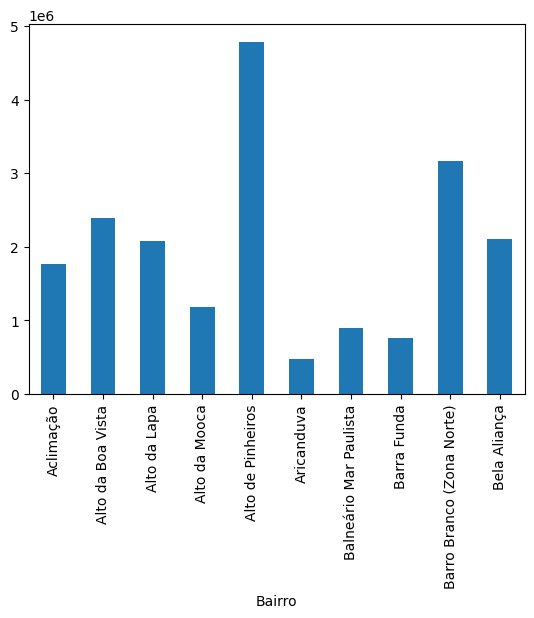

In [81]:
# 1° gráfico - Média de preços por bairro
dados_bairro = dados.groupby("Bairro")

# Removendo caracteres não numéricos e espaços em branco
dados['Valor'] = dados['Valor'].replace({'R\$': '', ',': '', ' ': ''}, regex=True)

# Converter a coluna "Valor" para float
dados['Valor'] = pd.to_numeric(dados['Valor'], errors='coerce')

# Calculando a média
media_preco_por_bairro = dados_bairro["Valor"].mean()

# Imprimindo a média de preços por bairro
media_preco_por_bairro.head(10).plot.bar()

## Desafio 4

### Pegar outras estatísticas dos dados, como média, mediana, valor min., valor max.

In [88]:
# Valor mínimo e máximo para morar em Pinheiros
dados_pinheiros = dados[dados["Bairro"] == "Pinheiros"]

valor_min_pinheiros = dados_pinheiros["Valor"].min()
valor_max_pinheiros = dados_pinheiros["Valor"].max()

print(f"O valor mínimo para morar em Pinheiros é de R$ {valor_min_pinheiros:.2f}")
print(f"O valor máximo para morar em Pinheiros é de R$ {valor_max_pinheiros:.2f}")

# A mediano da valor para morar em São Paulo
valor_mediana = dados["Valor"].median()

print(f"A mediana da valor para morar em São Paulo é de R$ {valor_mediana:.2f}")

O valor mínimo para morar em Pinheiros é de R$ 692000.00
O valor máximo para morar em Pinheiros é de R$ 19150000.00
A mediana da valor para morar em São Paulo é de R$ 1800000.00


## Desafio 5

### Descobrir quais são os bairros que não tem nome de rua

In [108]:
# Verificar quais bairros não têm nome de rua
bairros_sem_rua = dados[dados['Rua'].isnull()]

# Printar os bairros sem nomes de rua e sua quantidades
print("Bairros que não têm nome de rua:")
print(bairros_sem_rua.groupby('Bairro').size())

# Teste para ver se o bairro de alto pinheiro bate
alto_pinheiros = dados[dados["Bairro"] == "Alto de Pinheiros"]
alto_pinheiros[dados['Rua'].isnull()]

Bairros que não têm nome de rua:
Bairro
Aclimação              2
Alto da Boa Vista      1
Alto da Lapa          29
Alto da Mooca          5
Alto de Pinheiros    169
                    ... 
Vila do Encontro       3
Água Branca            2
Água Fria              1
Água Funda             2
Água Rasa              3
Length: 394, dtype: int64


<ipython-input-108-877019d7dfe1>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alto_pinheiros[dados['Rua'].isnull()]


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
84,NaN,Alto de Pinheiros,São Paulo,358,4,4,4,3500000.0
227,NaN,Alto de Pinheiros,São Paulo,360,3,5,4,4950000.0
419,NaN,Alto de Pinheiros,São Paulo,426,4,7,5,2700000.0
421,NaN,Alto de Pinheiros,São Paulo,337,4,5,4,2900000.0
450,NaN,Alto de Pinheiros,São Paulo,400,4,3,4,2111000.0
...,...,...,...,...,...,...,...,...
9114,NaN,Alto de Pinheiros,São Paulo,350,5,6,6,2900000.0
9234,NaN,Alto de Pinheiros,São Paulo,670,4,5,6,2990000.0
9564,NaN,Alto de Pinheiros,São Paulo,461,7,6,7,2650000.0
9691,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,2650000.0
